# Рассчеты без распараллеливания

In [9]:
import time
import numpy as np
from datetime import datetime

Ns = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
Times = []

def shell_sort(data: list[int]) -> list[int]:
    last_index = len(data)
    step = len(data)//2
    while step > 0:
        # print('curr step is ', step)
        # распараллелить здесь
        for i in range(step, last_index, 1):    # проход по массиву с одним степом
            j = i
            delta = j - step

            # print('Before while: j = ', j,  ' delta = ', delta)
            while delta >= 0 and data[delta] > data[j]:
                data[delta], data[j] = data[j], data[delta]
                j = delta
                delta = j - step
                # print('data ', data, ' j = ', j, ' delta = ', delta)
        step //= 2
    return data

for N in Ns:
    np.random.seed(47)
    data = list(np.random.randint(0, 100, N))
    start = time.time()
    data = shell_sort(data)
    end = time.time()
    print(f'{N} elems sorting took {end - start} sec')
    Times.append(end - start)

print(Times)
np.save("shell_sort/Shell_times_" + str(0) + "py.npy", np.array(Times))

10 elems sorting took 0.0 sec
100 elems sorting took 0.0 sec
1000 elems sorting took 0.0039937496185302734 sec
10000 elems sorting took 0.0540008544921875 sec
100000 elems sorting took 0.9390294551849365 sec
1000000 elems sorting took 8.426015615463257 sec
10000000 elems sorting took 128.44643425941467 sec
[0.0, 0.0, 0.0039937496185302734, 0.0540008544921875, 0.9390294551849365, 8.426015615463257, 128.44643425941467]


# MPI на компе на питоне

In [1]:
from matplotlib import pyplot as plt

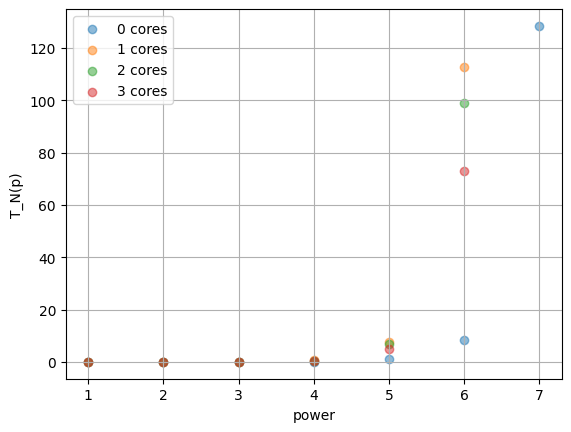

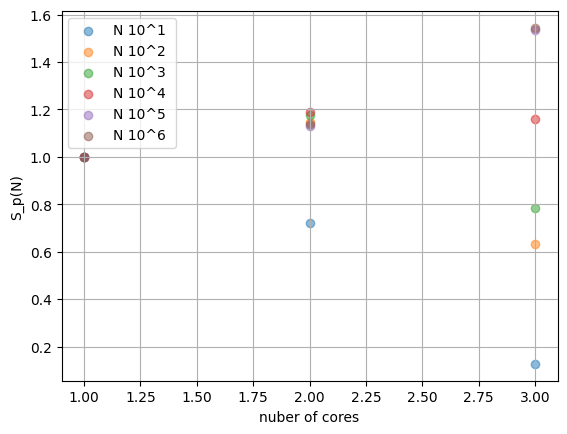

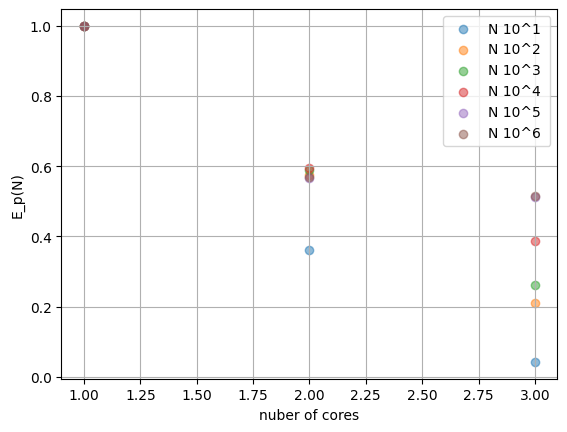

In [18]:
import numpy as np
Times = []
for i in range(4):
    tmp = np.load('shell_sort/Shell_times_'+str(i)+'py.npy')
    plt.scatter(np.arange(1, len(tmp)+1), tmp, label=f'{i} cores', alpha=0.5)
    Times.append(tmp)
plt.xlabel('power')
plt.ylabel('T_N(p)')
plt.grid()
plt.legend(loc='best')
plt.show()

S = np.array([elem for elem in Times[1:]])
S = S.T
E = [elem[0]/elem for elem in S]
E = E/np.arange(1, 4)
S = [elem[0]/elem for elem in S]

for i in np.arange(1, 7):
    plt.scatter(np.arange(1, len(S[i-1])+1), S[i-1], label=f'N 10^{i} ', alpha=0.5)
plt.xlabel('nuber of cores')
plt.ylabel('S_p(N)')
plt.grid()
plt.legend(loc='best')
plt.show()

for i in np.arange(1, 7):
    plt.scatter(np.arange(1, len(E[i-1])+1), E[i-1], label=f'N 10^{i} ', alpha=0.5)
plt.xlabel('nuber of cores')
plt.ylabel('E_p(N)')
plt.grid()
plt.legend(loc='best')
plt.show()

# Times_e = []
# Errs_e = []
# for i in range(5):
#     Times_pi.append(np.load('python_mpi_pi/' + str(i) + 'cores_times.npy'))
#     Errs_pi.append(np.load('python_mpi_pi/' + str(i) + 'cores_errs.npy'))
    
#     Times_e.append(np.load('python_mpi_e/' + str(i) + 'cores_times.npy'))
#     Errs_e.append(np.load('python_mpi_e/' + str(i) + 'cores_errs.npy'))

# N_pi = np.log10(np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000]))
# N_e = np.log10(np.array([5, 6, 7, 10, 100, 1000, 10000]))


Видим ускорение для N больших чем 10^4 (S_p(N) становится > 1)

PS ядер на компьютере максимум 3 тк нулевое ядро яв-ся мастером процессов (см.код)

# Си

In [36]:
cores = [1, 2,3,4,6,8,10,12,14,16]
C_6 = np.array([0.430293,0.435097,0.242270,0.195105,0.167830,0.158817,0.154612,0.164477,0.161895,0.174732]) # 1000000

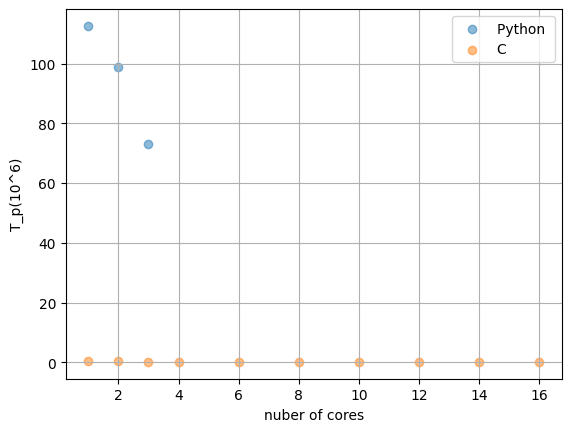

In [37]:
T = np.array([elem for elem in Times[1:]])
T = T.T
T.shape

plt.scatter([1,2,3], T[-1], label=f'Python ', alpha=0.5)
plt.scatter(cores, C_6, label=f'C ', alpha=0.5)
plt.xlabel('nuber of cores')
plt.ylabel('T_p(10^6)')
plt.grid()
plt.legend(loc='best')
plt.show()

Окей, си разваливают. Посмортрим на них отдельно

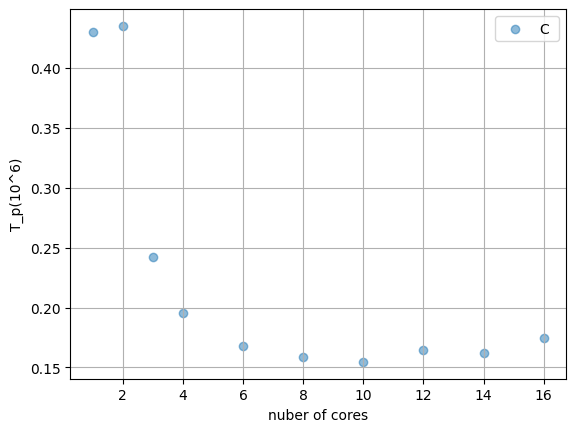

In [38]:
plt.scatter(cores, C_6, label=f'C ', alpha=0.5)
plt.xlabel('nuber of cores')
plt.ylabel('T_p(10^6)')
plt.grid()
plt.legend(loc='best')
plt.show()

Промерим для других степеней 

In [39]:
C_7 = np.array([6.233468,6.156041,3.281853,2.500666,1.935779,1.676790,1.623036,1.584827,1.724135,1.790603])

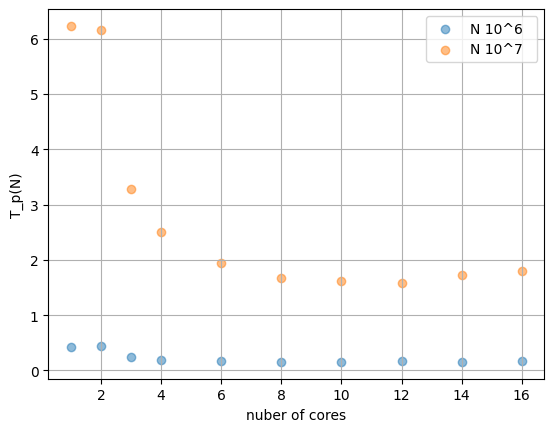

In [40]:
plt.scatter(cores, C_6, label=f'N 10^6  ', alpha=0.5)
plt.scatter(cores, C_7, label=f'N 10^7 ', alpha=0.5)
plt.xlabel('nuber of cores')
plt.ylabel('T_p(N)')
plt.grid()
plt.legend(loc='best')
plt.show()

Для N = 10^7 в общем время выросло на порядок, что допустимо. Изменение знака производной для N = 10^6 происходит при 10 ядрах, для N = 10^7 при 12.
Это значит, что при большем числе N лучше использовать больше ядер - логично

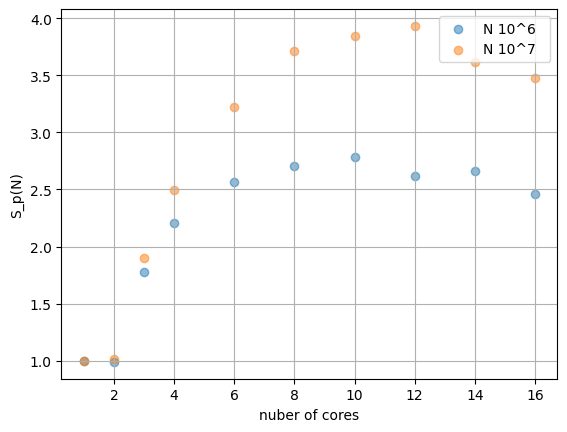

In [41]:
С_6 = np.array(C_6) 
С_7 = np.array(С_7) 
C_6 = C_6[0]/C_6
C_7 = C_7[0]/C_7
plt.scatter(cores, C_6, label=f'N 10^6  ', alpha=0.5)
plt.scatter(cores, C_7, label=f'N 10^7 ', alpha=0.5)
plt.xlabel('nuber of cores')
plt.ylabel('S_p(N)')
plt.grid()
plt.legend(loc='best')
plt.show()

Как я и отметил ранее ускорение макс для 10 и 12 ядер соотв

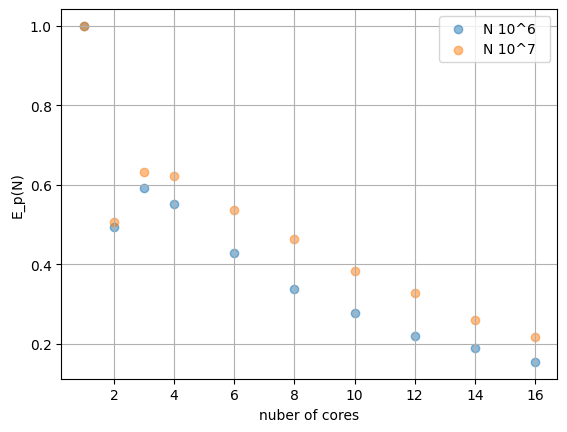

In [42]:
C_6 = C_6 / np.array(cores)
C_7 = C_7 / np.array(cores)
plt.scatter(cores, C_6, label=f'N 10^6  ', alpha=0.5)
plt.scatter(cores, C_7, label=f'N 10^7 ', alpha=0.5)
plt.xlabel('nuber of cores')
plt.ylabel('E_p(N)')
plt.grid()
plt.legend(loc='best')
plt.show()

макс эффективность для 3 ядер